# Question 3: Clustering
**1.1 K-means clustering**

**<font color='teal'>a)</font>** Perform K-means clustering on the formulae from the heat capacity problem (HW2, Question 2). See if you can see trends in clusters when you change the numbers of clusters (turning on data point labels with formula will help)

In [7]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(os.getcwd(),"HW2_Q2_data\cp_data_cleaned.csv"))

First, perform the clustering on the T and Cp data

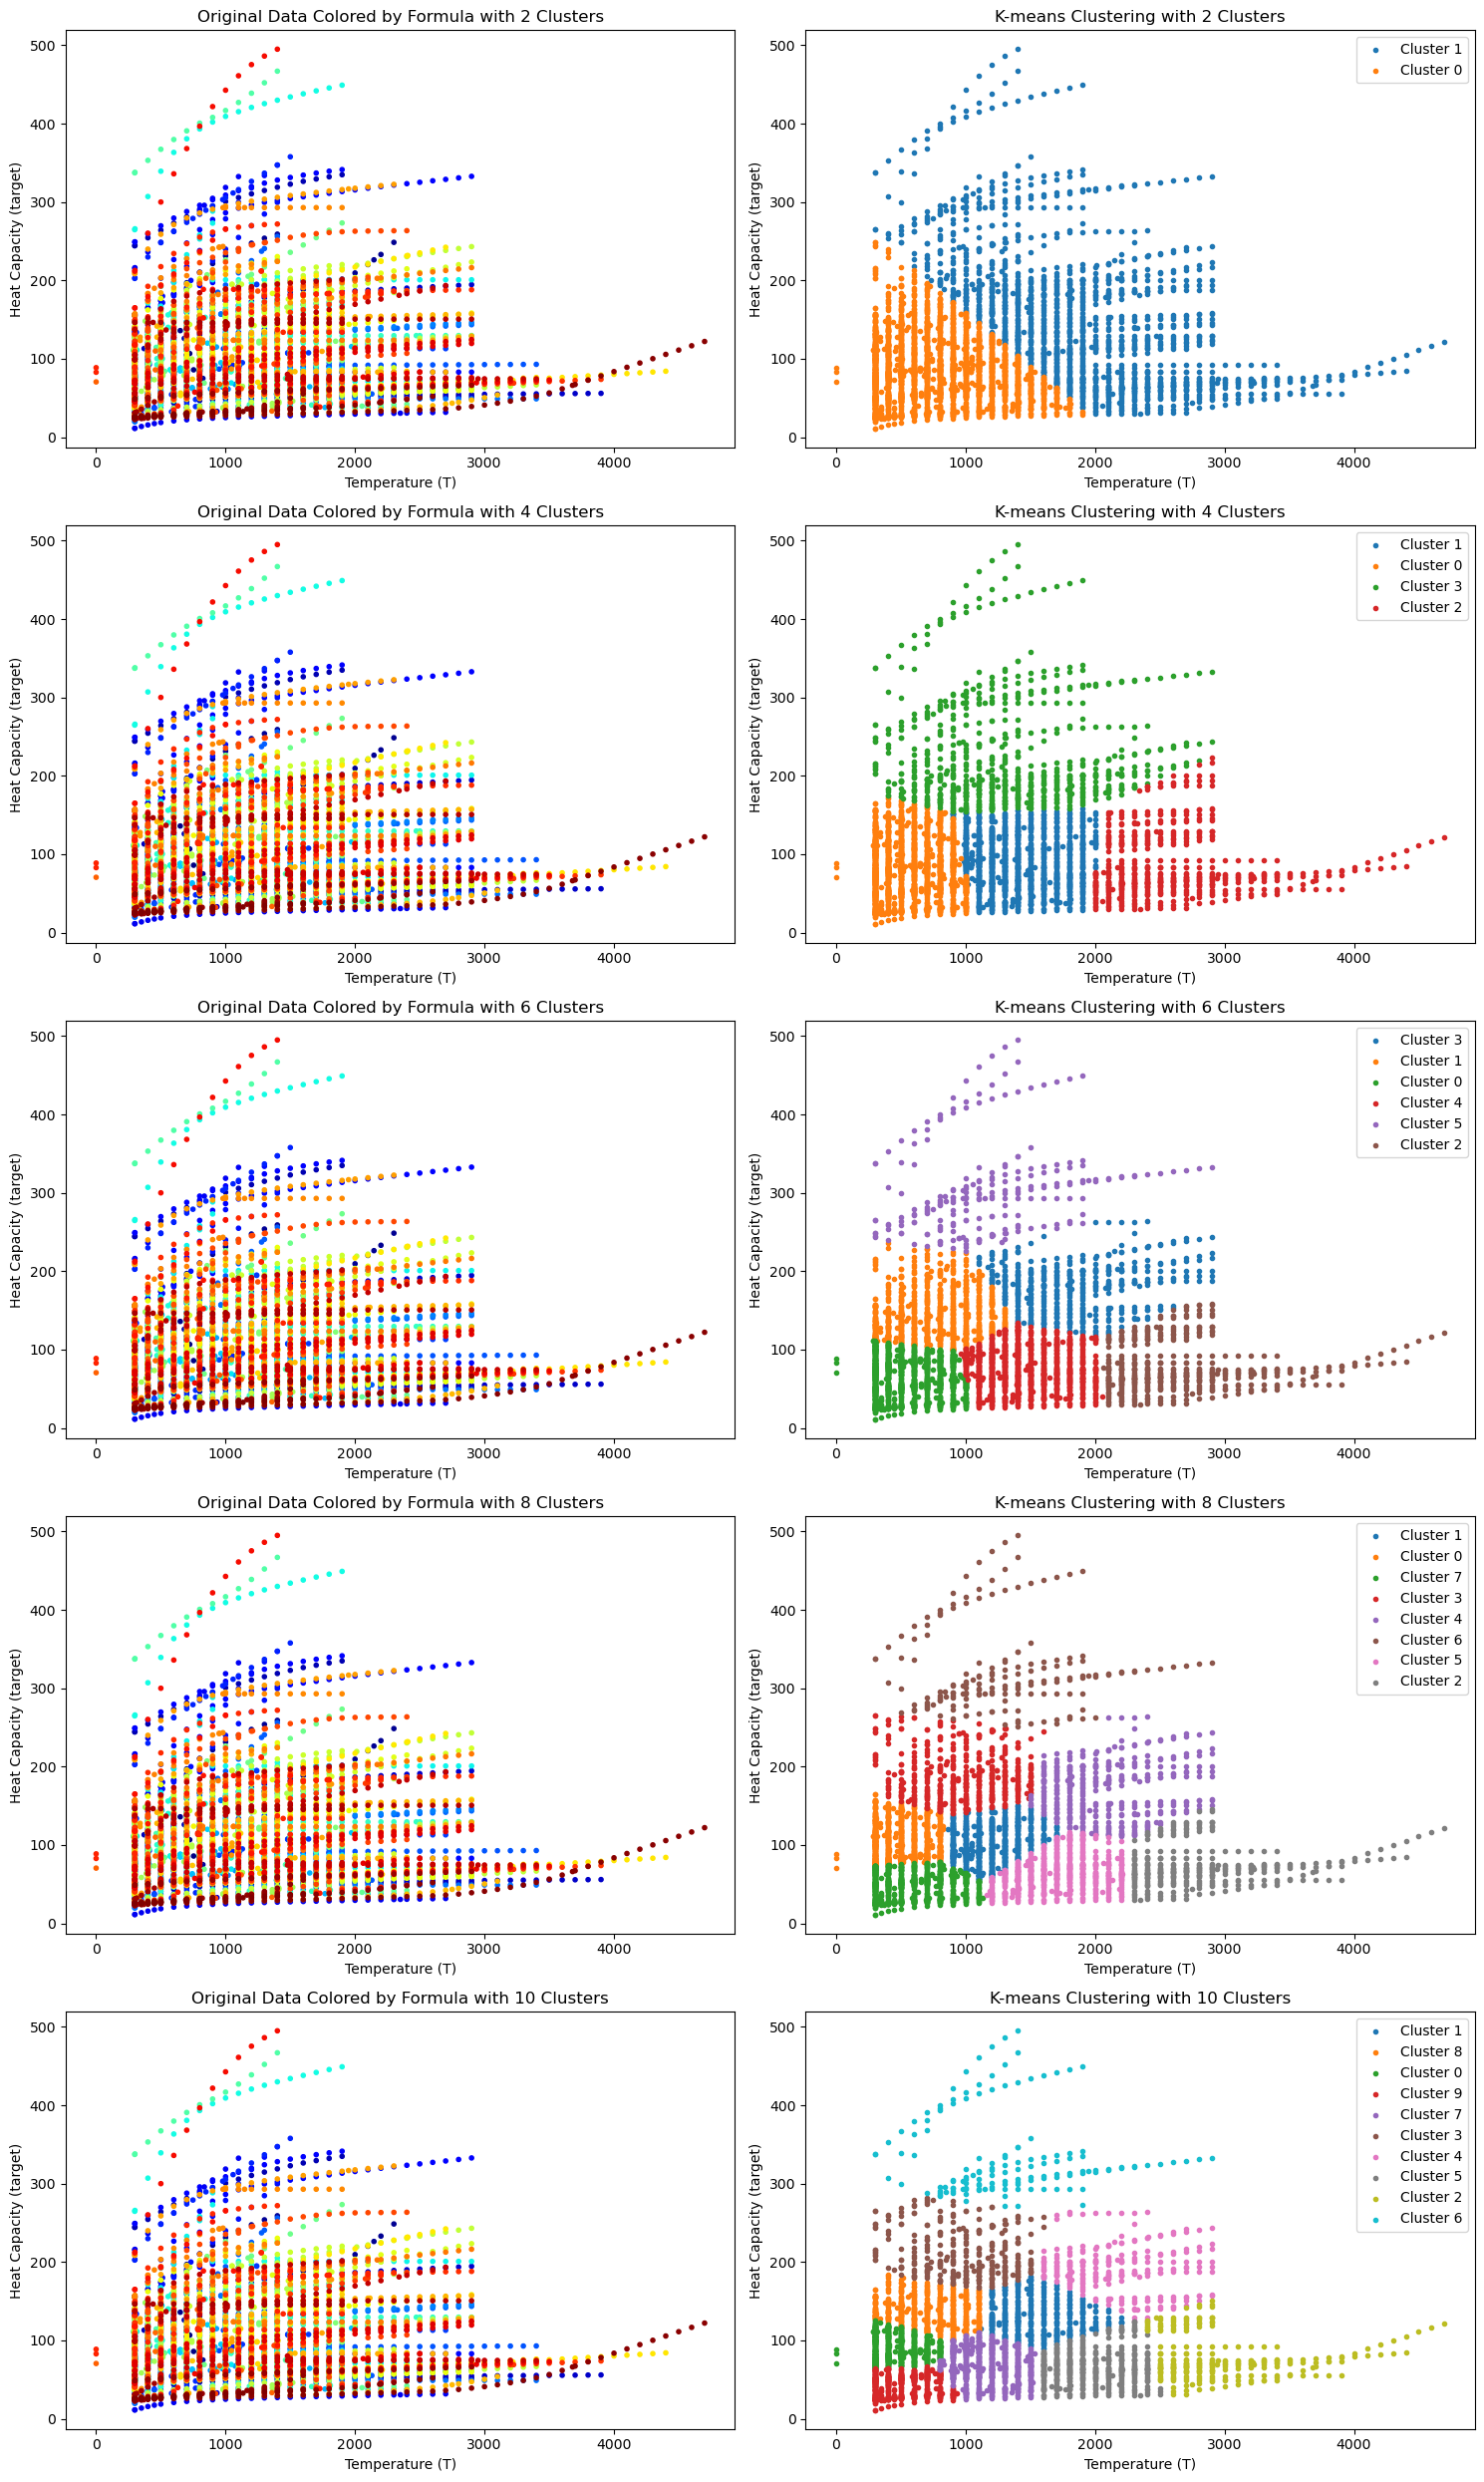

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and it has columns 'T', 'target', and 'formula'
# First, scale the 'T' and 'target' columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['T', 'target']])

# Prepare a color map for the 'formula' column
unique_formulas = df['formula'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_formulas)))
formula_to_color = dict(zip(unique_formulas, colors))

# List of desired numbers of clusters
n_clusters_list = [2, 4, 6, 8, 10]

# Set up the plot for a matrix with 2 columns and len(n_clusters_list) rows
fig, axs = plt.subplots(len(n_clusters_list), 2, figsize=(15, 5 * len(n_clusters_list)))

for i, n_clusters in enumerate(n_clusters_list):
    # K-means clustering on the scaled data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    df['cluster'] = kmeans.labels_
    
    # First column of each row: Plotting the cluster plot
    axs[i, 0].scatter(df['T'], df['target'], c=[formula_to_color[formula] for formula in df['formula']], marker='.')
    axs[i, 0].set_title(f'Original Data Colored by Formula with {n_clusters} Clusters')
    axs[i, 0].set_xlabel('Temperature (T)')
    axs[i, 0].set_ylabel('Heat Capacity (target)')

    # Second column of each row: Plotting the original data colored by the formula
    for cluster_id in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_id]
        axs[i, 1].scatter(cluster_data['T'], cluster_data['target'], label=f'Cluster {cluster_id}', marker='.')
    axs[i, 1].set_title(f'K-means Clustering with {n_clusters} Clusters')
    axs[i, 1].set_xlabel('Temperature (T)')
    axs[i, 1].set_ylabel('Heat Capacity (target)')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


The clustering on the temperature and heat capacity is poorly correlated to the formulae

In [9]:
# Featurize the data from the formulae while keeping the T data by extending the features
from CBFV.composition import generate_features

X, y, formulae, skipped = generate_features(df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data:   0%|          | 0/4547 [00:00<?, ?it/s]

Processing Input Data: 100%|██████████| 4547/4547 [00:00<00:00, 10311.84it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4547/4547 [00:00<00:00, 9136.11it/s]


	Creating Pandas Objects...


Now, perform the clustering on the CBFV featurized dataset and then the original data is plotted side by side with color coding by cluster assignement and by formula to see trends

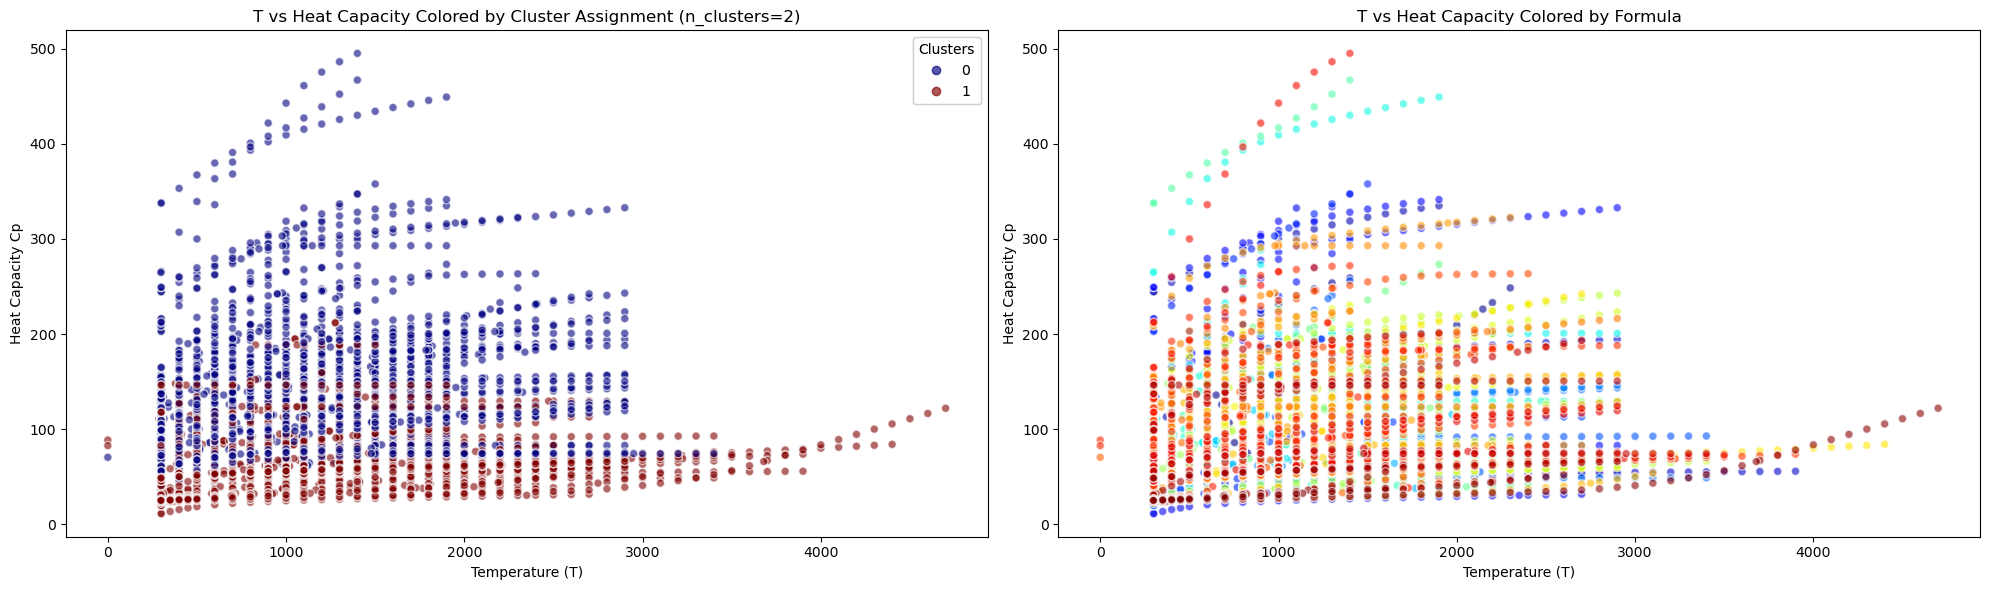

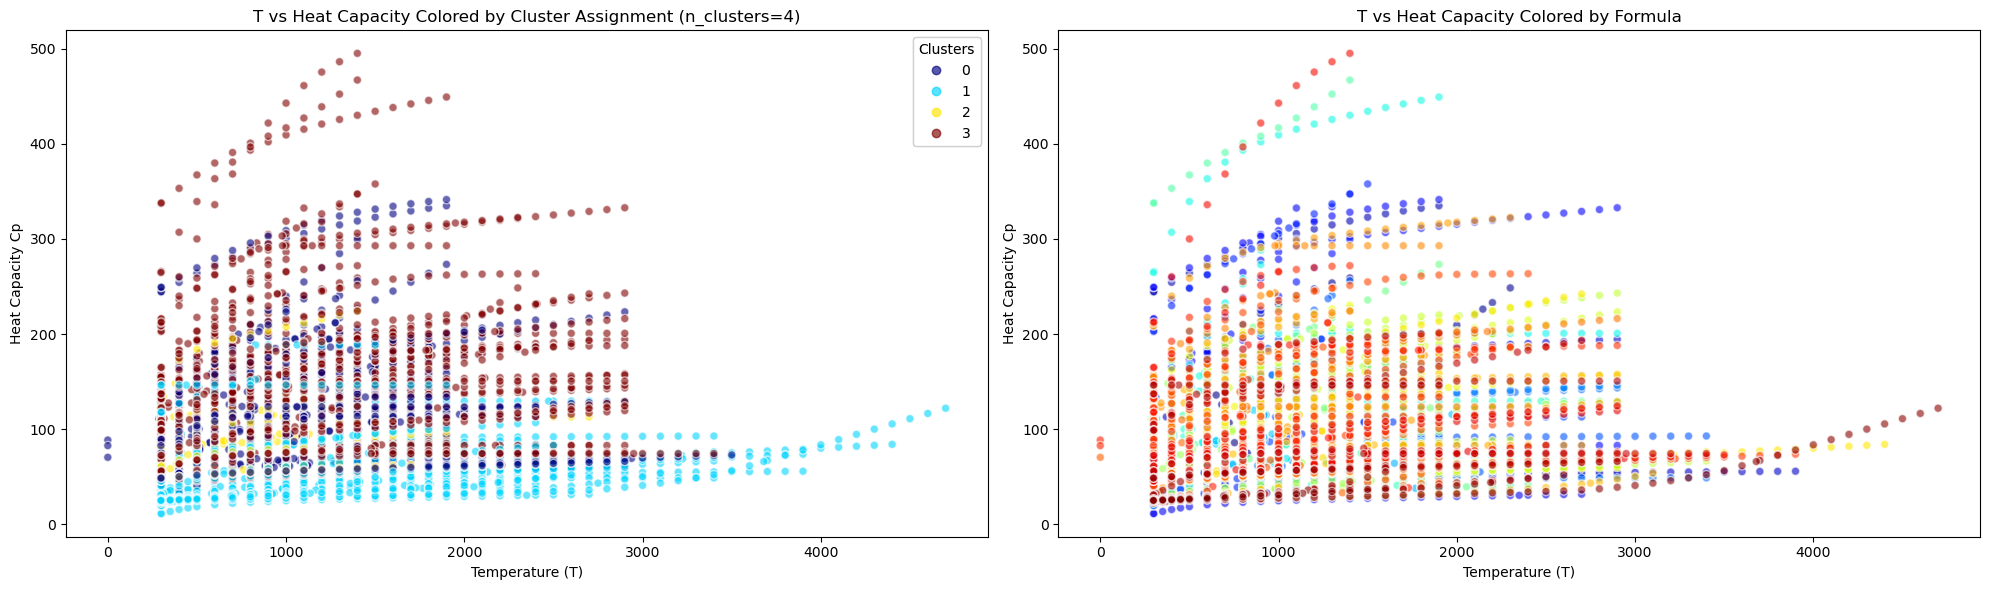

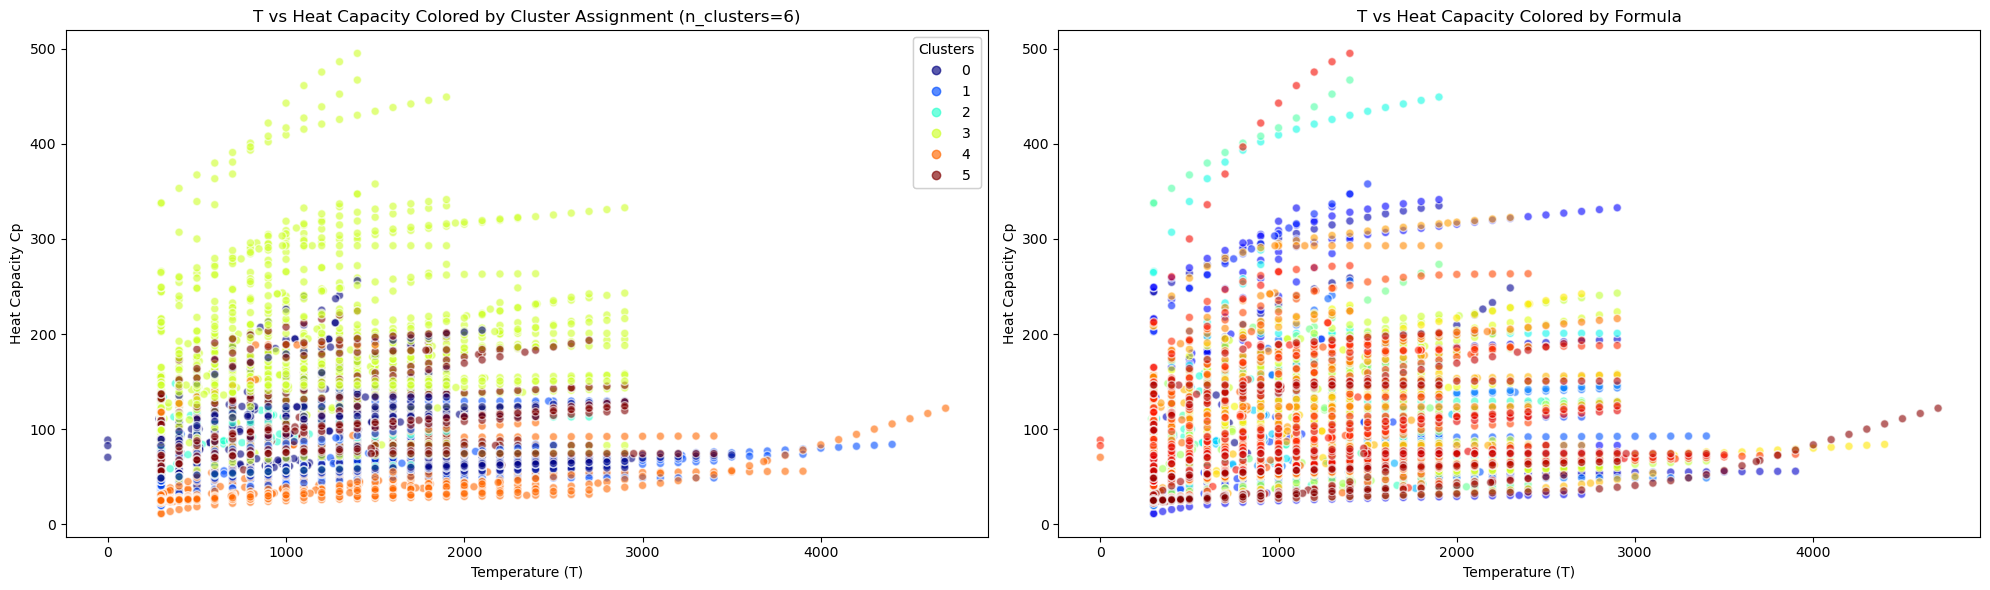

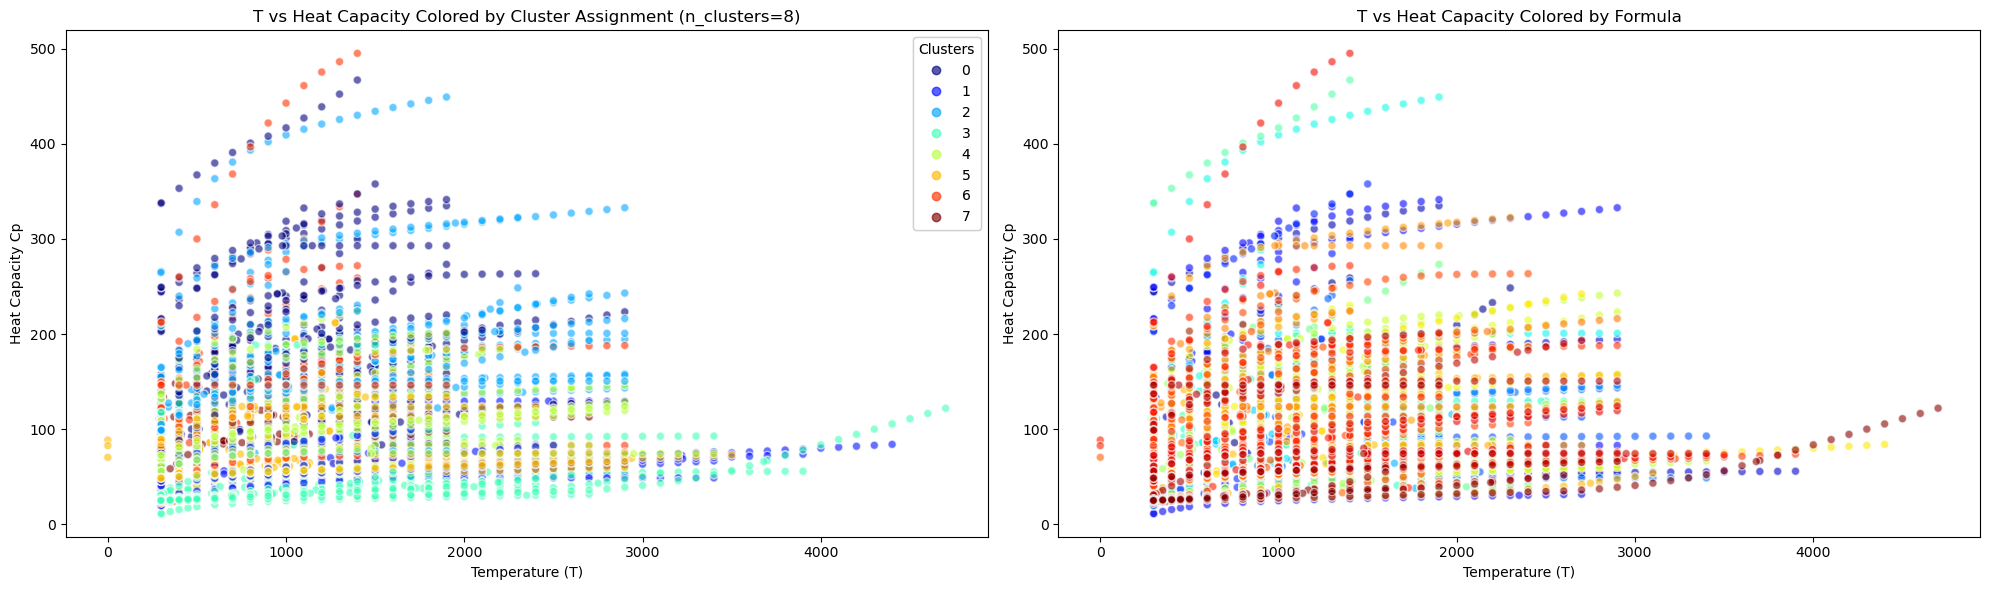

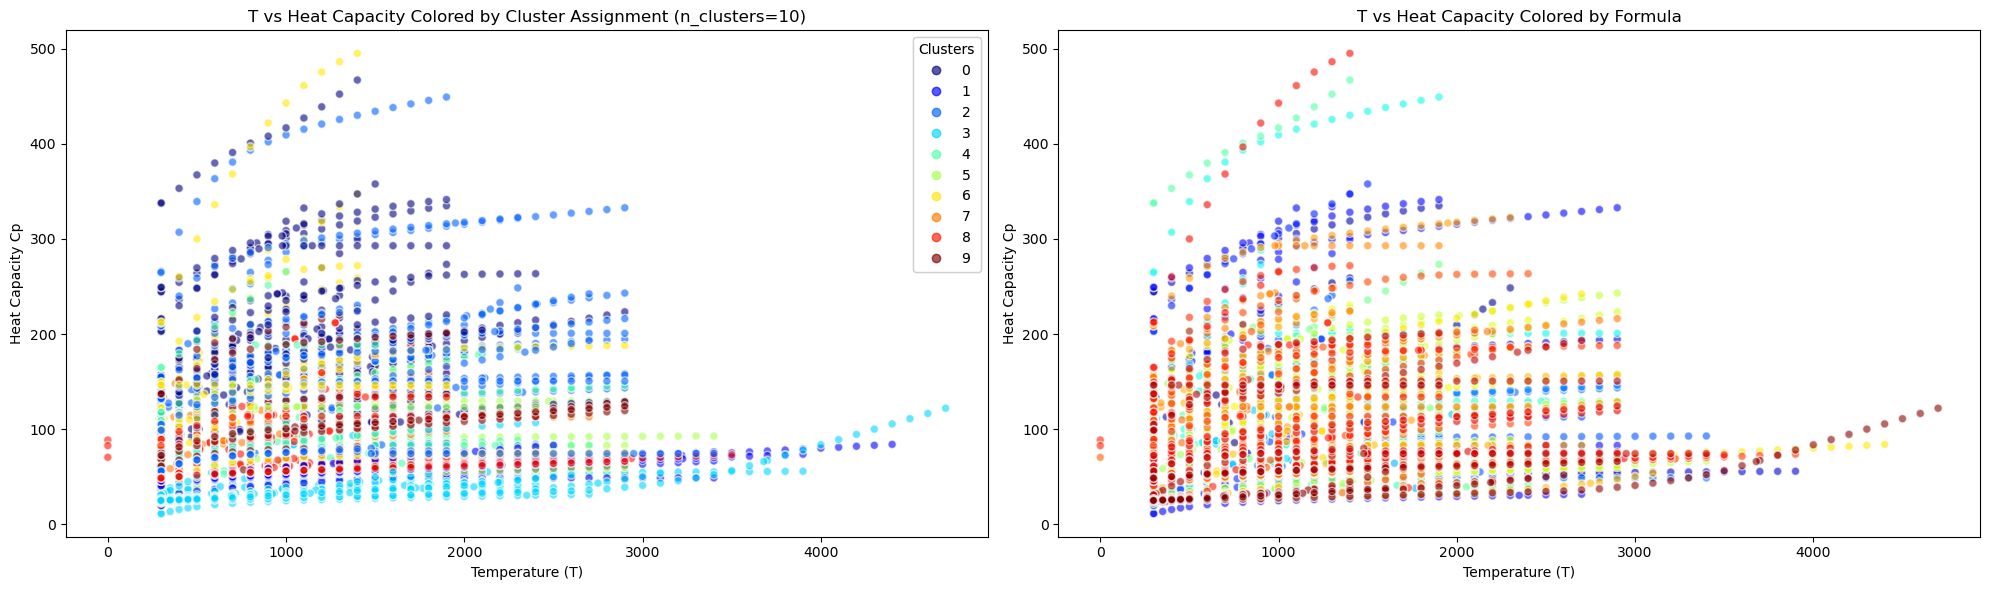

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
import pandas as pd
import matplotlib.pyplot as plt

n_cluster_list = [2, 4, 6, 8, 10]

# Standard Scaling and Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = normalize(X_scaled)

for n_clusters in n_cluster_list:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    
    # The cluster assignments are stored in kmeans.labels_
    clusters = kmeans.labels_
    
    # Add cluster assignments to the original DataFrame
    df['cluster'] = clusters
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns subplot matrix
    
    # Cluster plot
    scatter1 = axes[0].scatter(df['T'], df['target'], c=df['cluster'], cmap='jet', alpha=0.6, edgecolor='w')
    axes[0].set_xlabel('Temperature (T)')
    axes[0].set_ylabel('Heat Capacity Cp')
    axes[0].set_title(f'T vs Heat Capacity Colored by Cluster Assignment (n_clusters={n_clusters})')
    legend1 = axes[0].legend(*scatter1.legend_elements(), title="Clusters")
    axes[0].add_artist(legend1)
    
    # Color coded by formula
    unique_formulas = df['formula'].unique()
    color_map = {formula: i for i, formula in enumerate(unique_formulas)}
    scatter2 = axes[1].scatter(df['T'], df['target'], c=df['formula'].map(color_map), cmap='jet', alpha=0.6, edgecolor='w')
    axes[1].set_xlabel('Temperature (T)')
    axes[1].set_ylabel('Heat Capacity Cp')
    axes[1].set_title('T vs Heat Capacity Colored by Formula')
     
    plt.tight_layout()
    plt.show()


The clustering using the olyinyk featurized data looks to be selecting the formulae pretty well.
10 clusters seems to correlate well with the formulae

**1.2 t-sne clustering vs umap**

**<font color='teal'>b)</font>** Now compare t-sne and umap embeddings. Explore the parameters a bit. 

In [12]:
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt

# t-SNE
tsne_embedding = TSNE(n_components=2, random_state=42).fit_transform(X)

# UMAP
umap_embedding = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)


c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


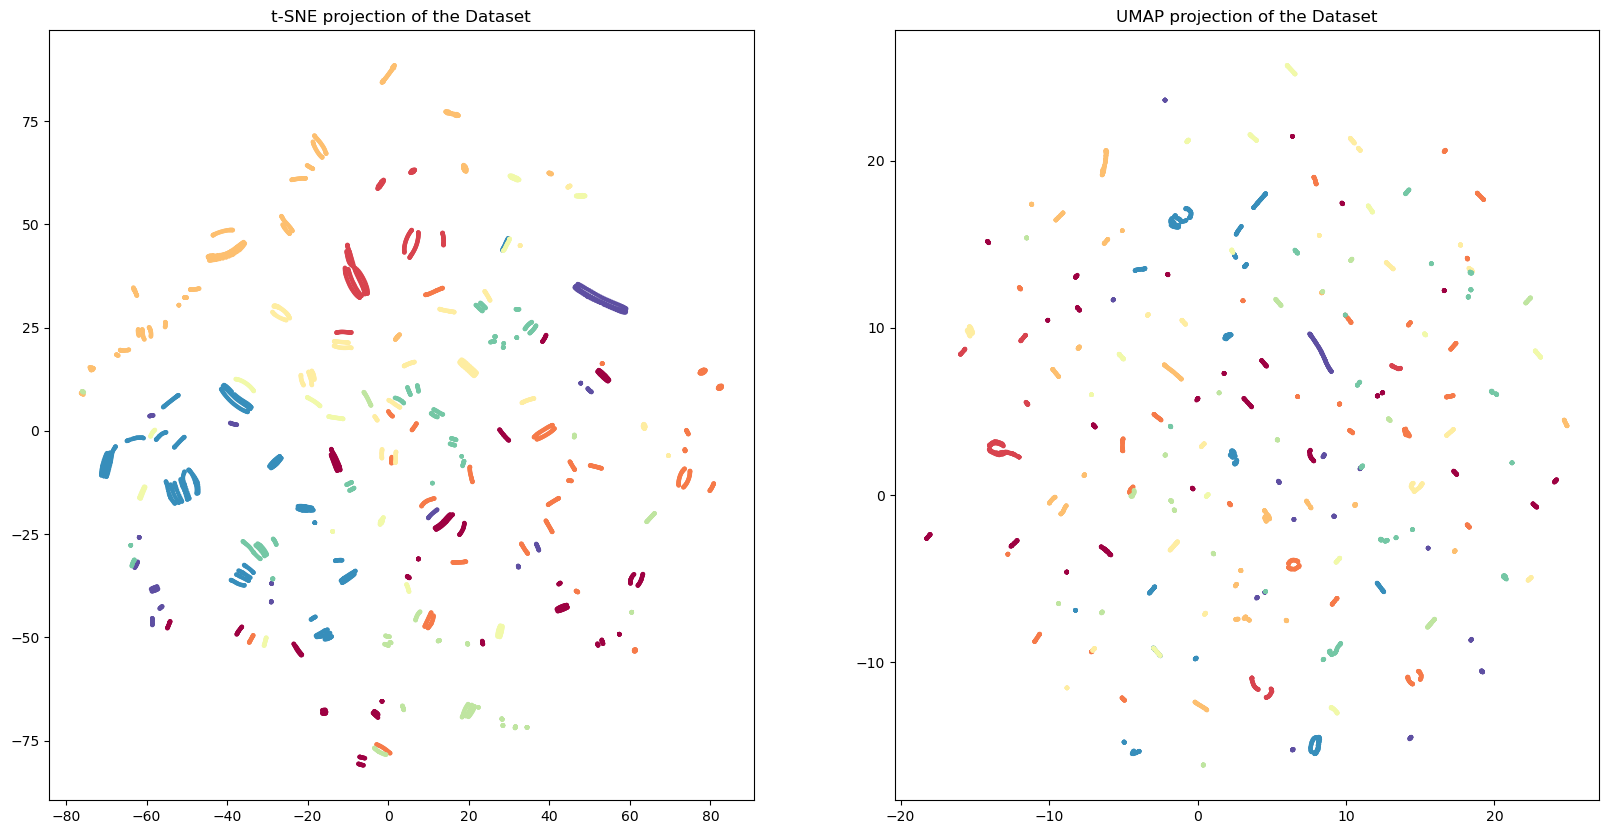

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE Plot
ax[0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=clusters, cmap='Spectral', s=5)
ax[0].set_title('t-SNE projection of the Dataset')

# UMAP Plot
ax[1].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=clusters, cmap='Spectral', s=5)
ax[1].set_title('UMAP projection of the Dataset')

plt.show()


c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


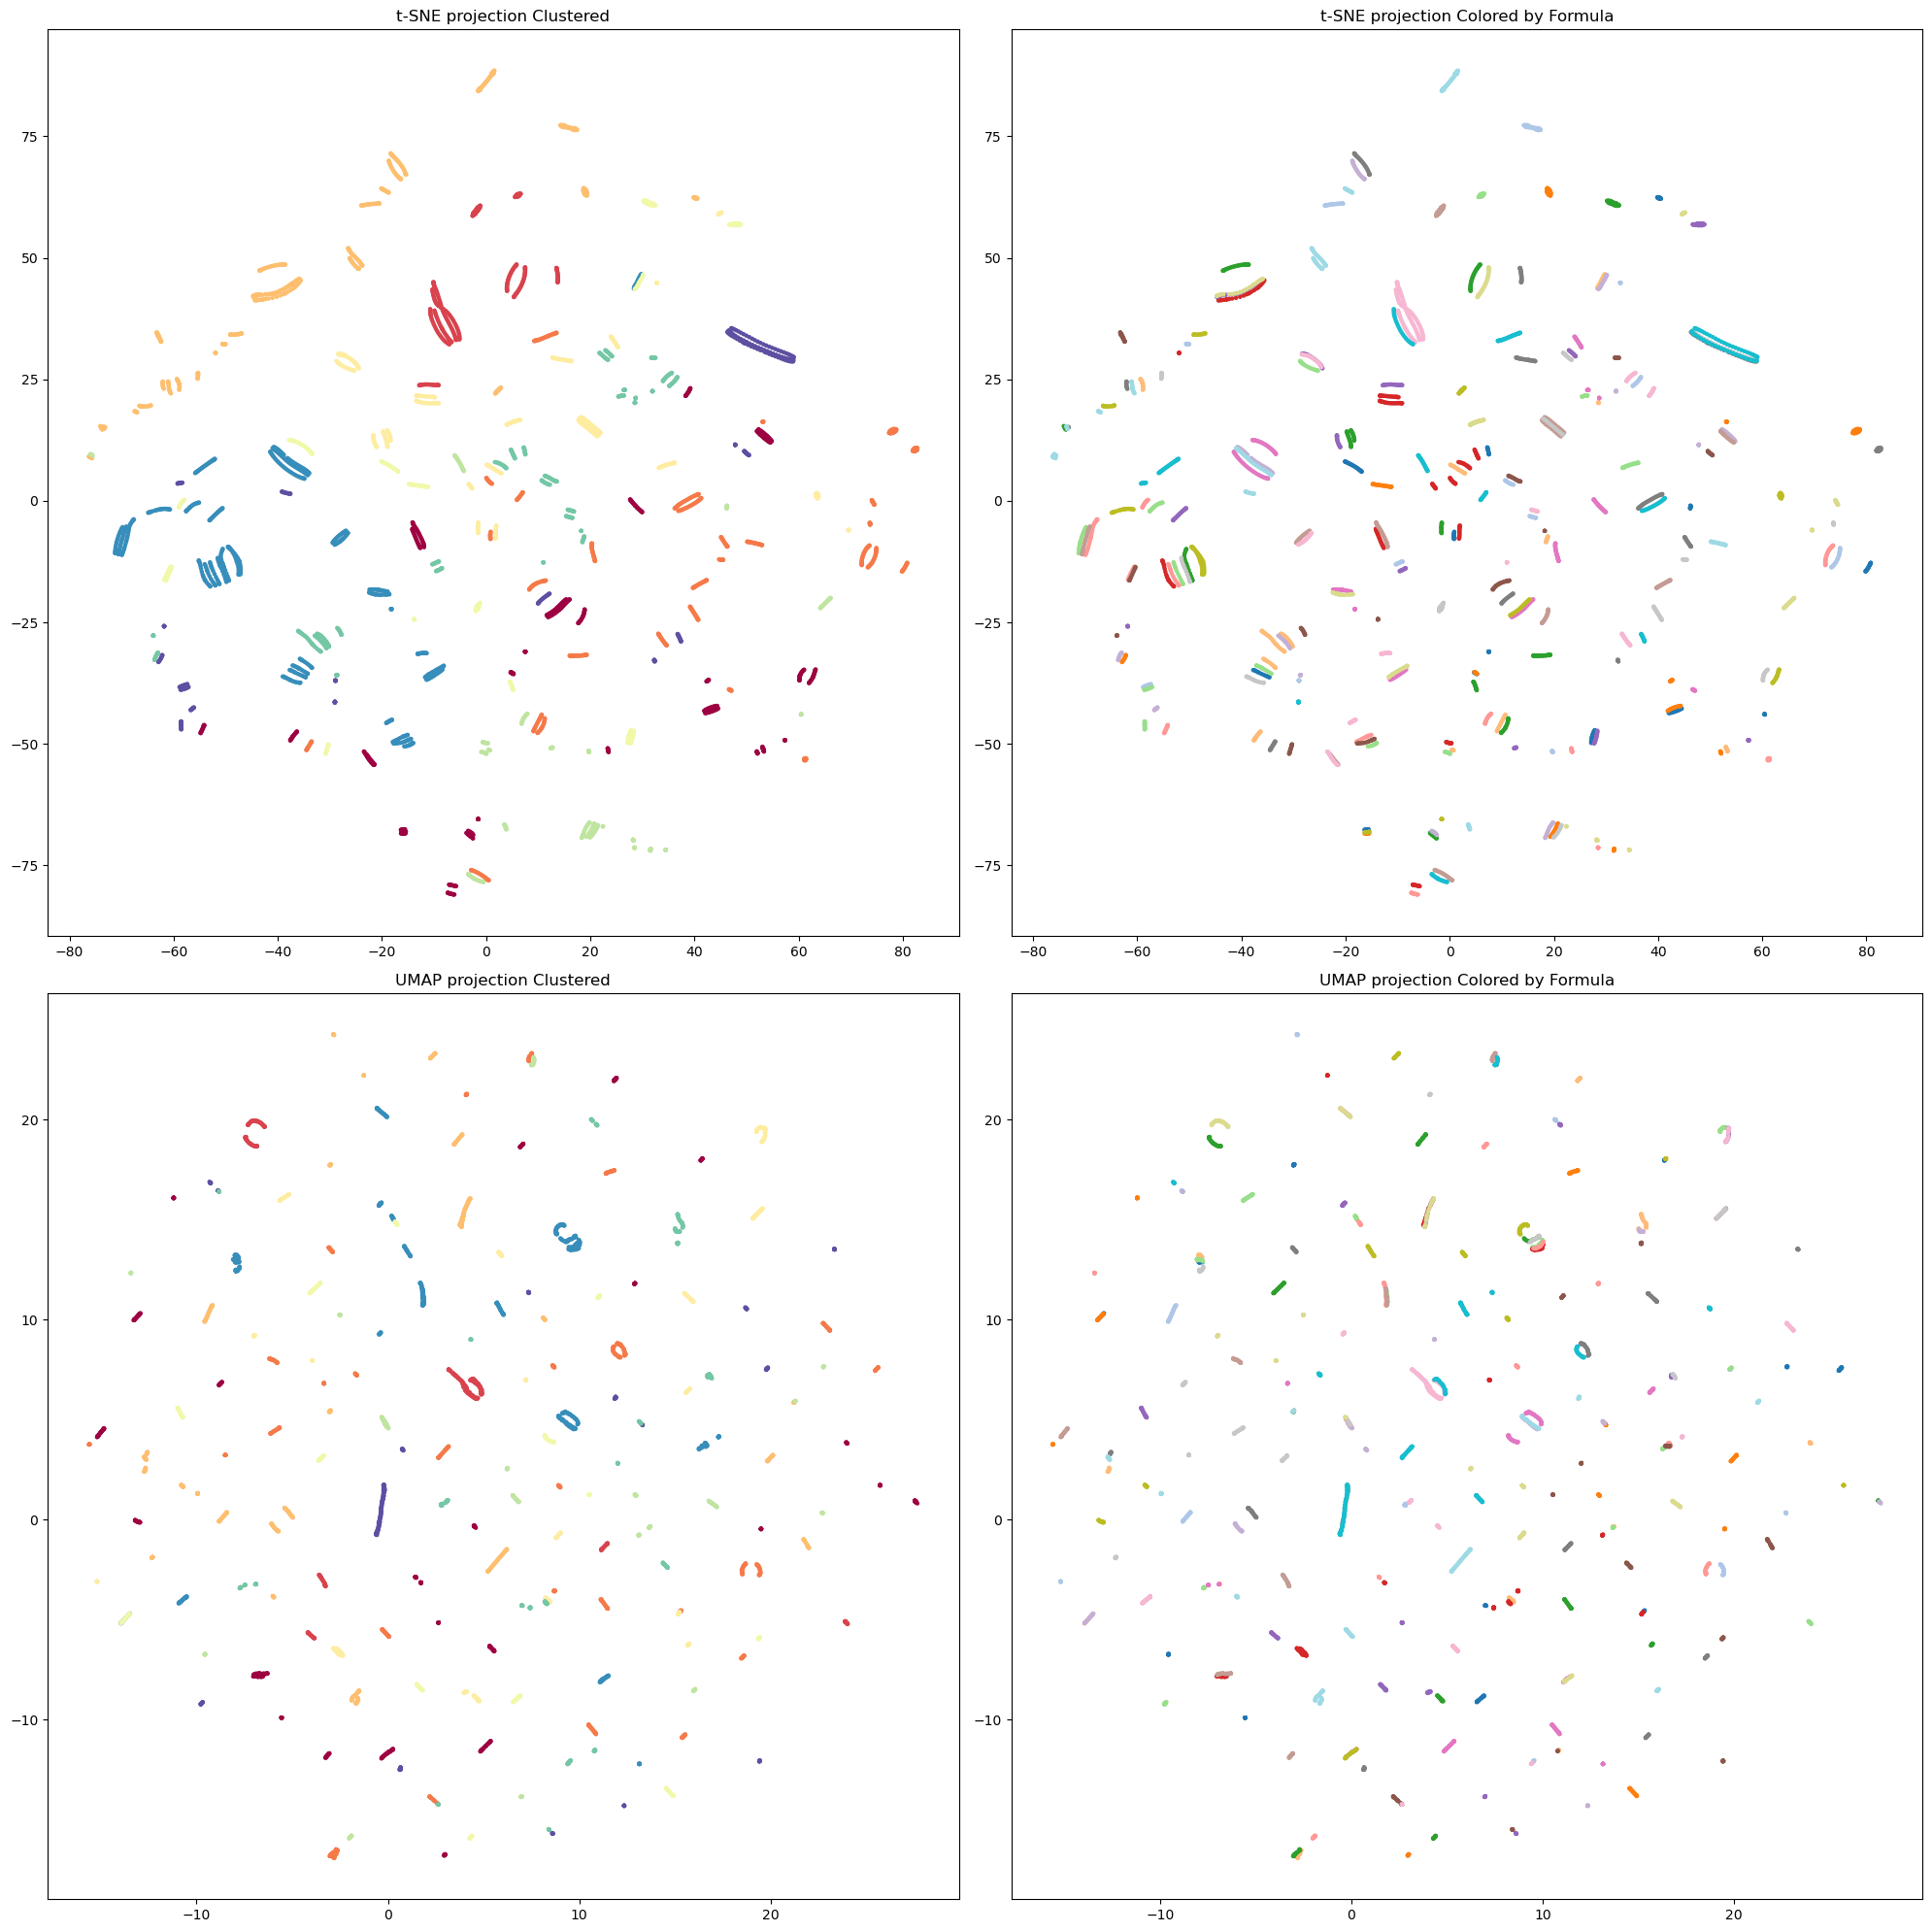

In [16]:
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'formula', 'T', 'target'
# Assuming 'X' is your feature matrix and 'clusters' contains KMeans cluster labels
# Generate a color map for formulas
unique_formulas = df['formula'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_formulas)))
formula_to_color = {formula: color for formula, color in zip(unique_formulas, colors)}

# Apply t-SNE
tsne_embedding = TSNE(n_components=2, random_state=42).fit_transform(X)

# Apply UMAP
umap_embedding = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# t-SNE Cluster Plot
axs[0, 0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=clusters, cmap='Spectral', s=5)
axs[0, 0].set_title('t-SNE projection Clustered')

# t-SNE Formula Plot
axs[0, 1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], 
                  c=[formula_to_color[formula] for formula in df['formula']], s=5)
axs[0, 1].set_title('t-SNE projection Colored by Formula')

# UMAP Cluster Plot
axs[1, 0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=clusters, cmap='Spectral', s=5)
axs[1, 0].set_title('UMAP projection Clustered')

# UMAP Formula Plot
axs[1, 1].scatter(umap_embedding[:, 0], umap_embedding[:, 1], 
                  c=[formula_to_color[formula] for formula in df['formula']], s=5)
axs[1, 1].set_title('UMAP projection Colored by Formula')

# Adjust layout
plt.tight_layout()


plt.show()


Try some different embedding parameters

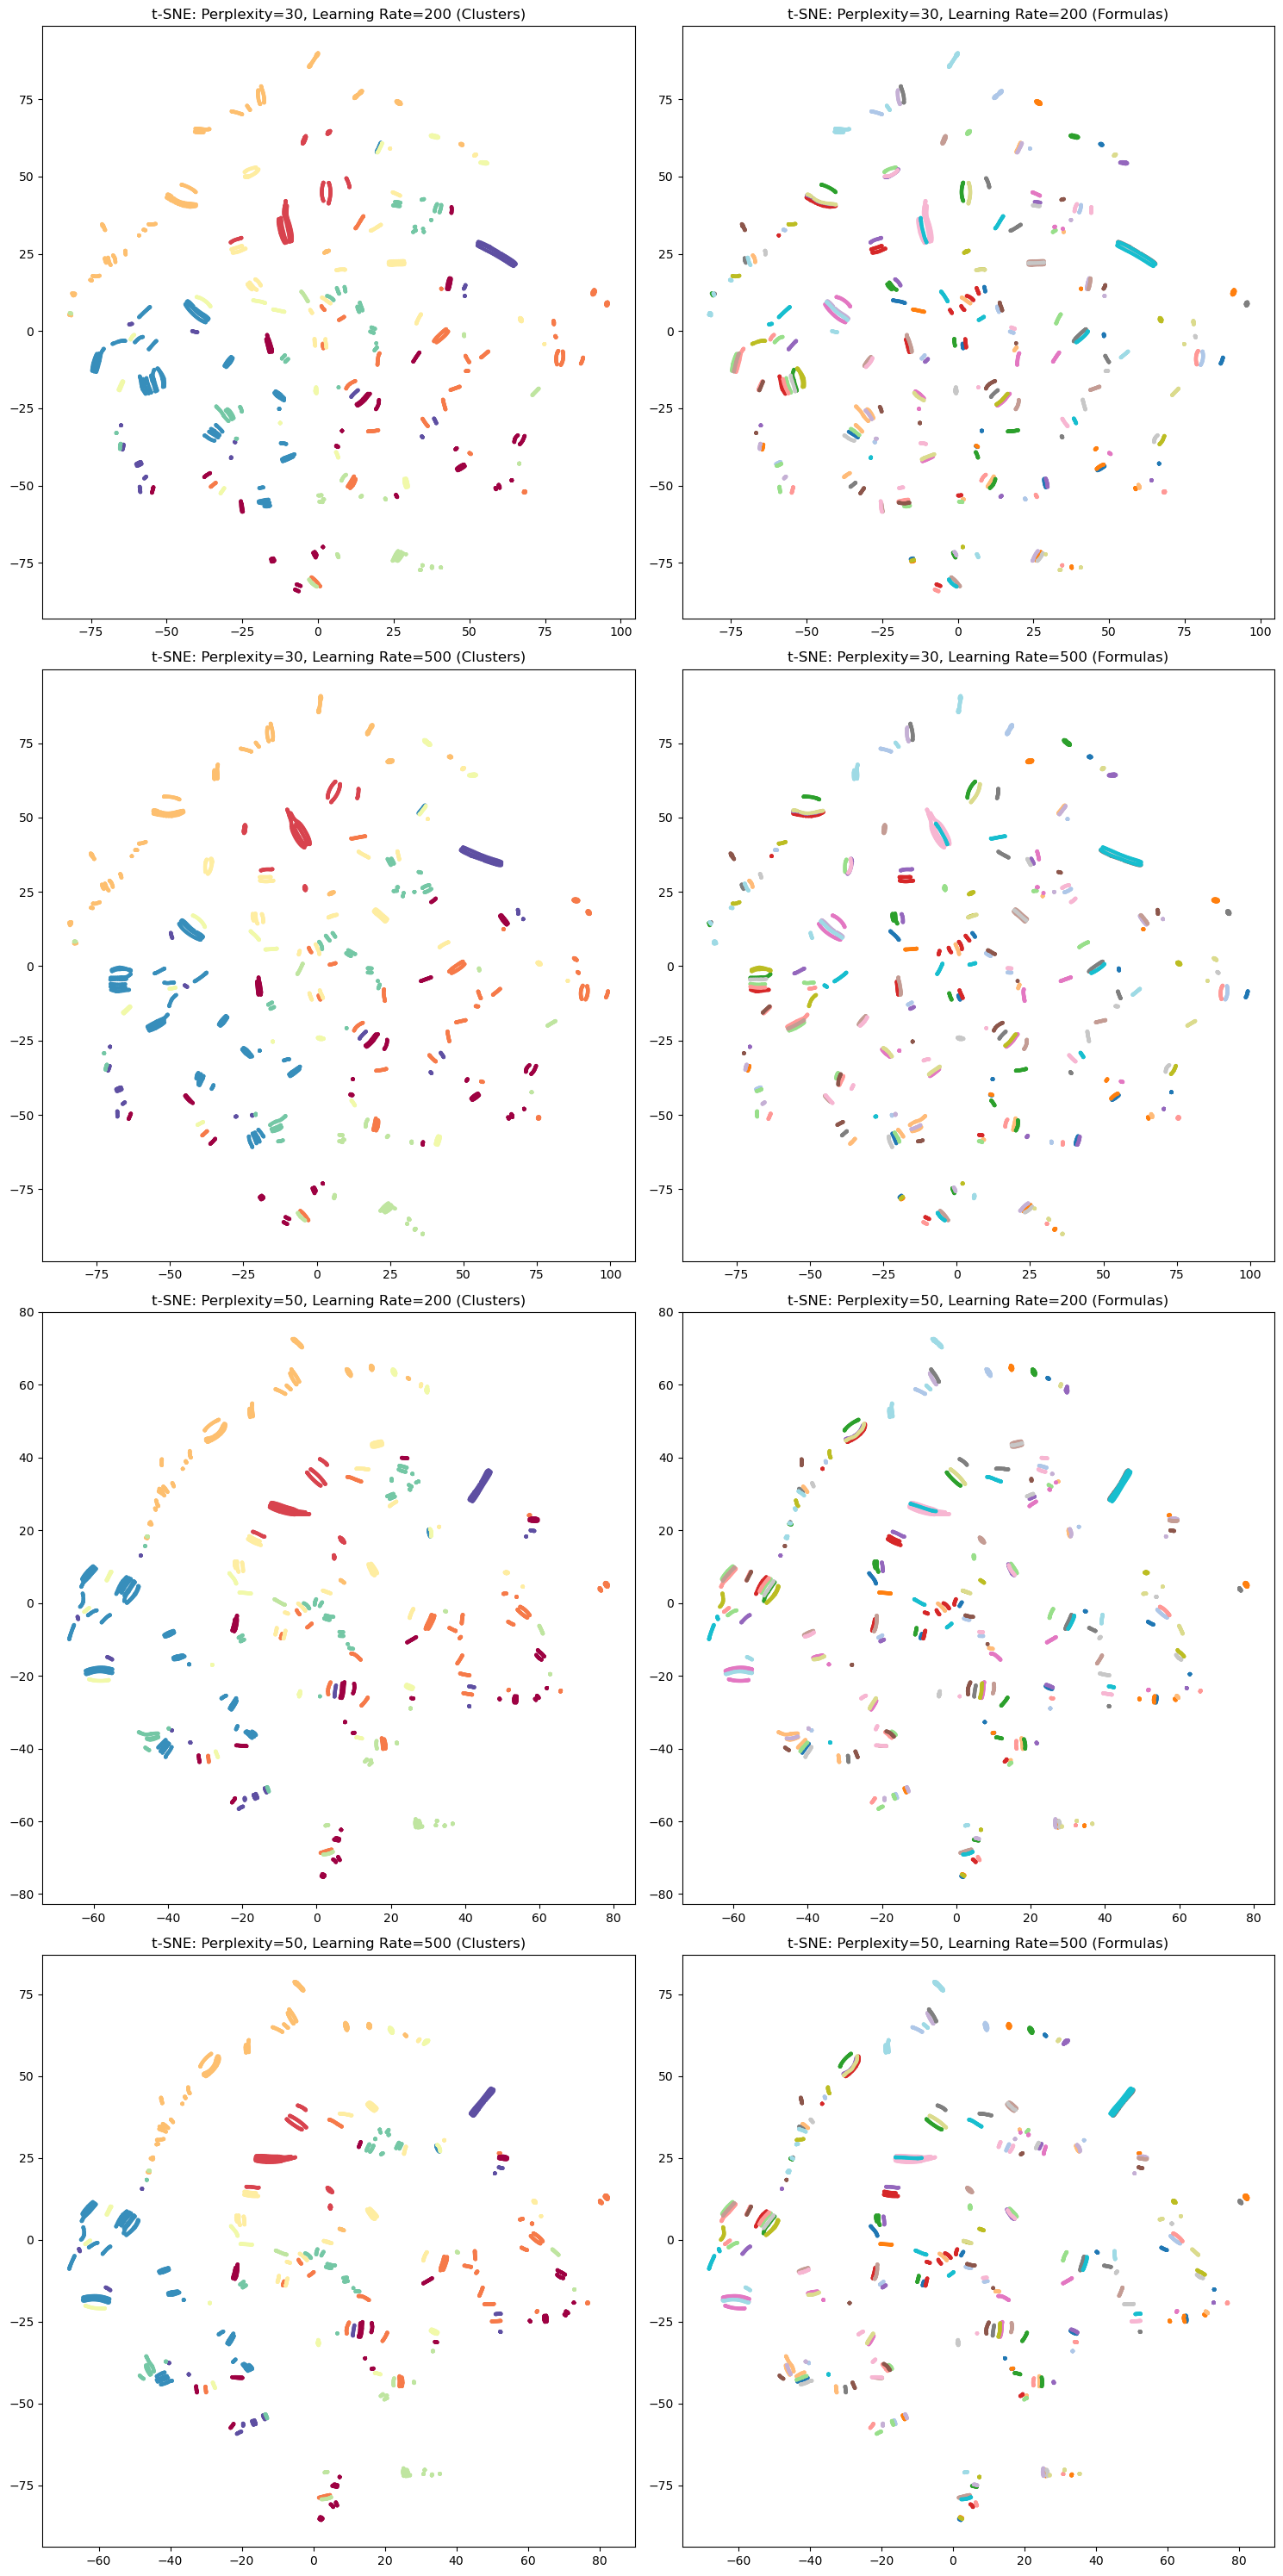

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'X' is your feature matrix from the previous step
# Assuming 'df' has columns 'cluster' and 'formula'
# Generate a color map for formulas
unique_formulas = df['formula'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_formulas)))
formula_to_color = {formula: color for formula, color in zip(unique_formulas, colors)}

# Define your levels of perplexity and learning rates
perplexities = [30, 50]  # Two levels of perplexity
learning_rates = [200, 500]  # Two levels of learning rate

# Set up the figure
fig, axs = plt.subplots(len(perplexities) * len(learning_rates), 2, figsize=(15, len(perplexities) * len(learning_rates) * 7.5))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        index = i * len(learning_rates) + j
        # Apply t-SNE with the current perplexity and learning rate
        tsne_embedding = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42).fit_transform(X)
        
        # Plot color-coded by cluster assignment
        axs[index, 0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df['cluster'], cmap='Spectral', s=5)
        axs[index, 0].set_title(f't-SNE: Perplexity={perplexity}, Learning Rate={learning_rate} (Clusters)')
        
        # Plot color-coded by formula
        formula_colors = [formula_to_color[formula] for formula in df['formula']]
        axs[index, 1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=formula_colors, s=5)
        axs[index, 1].set_title(f't-SNE: Perplexity={perplexity}, Learning Rate={learning_rate} (Formulas)')
        
        # Optional: Add legends for clusters or formulas if needed

plt.tight_layout()
plt.show()


c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\byron\miniconda3\envs\HW2

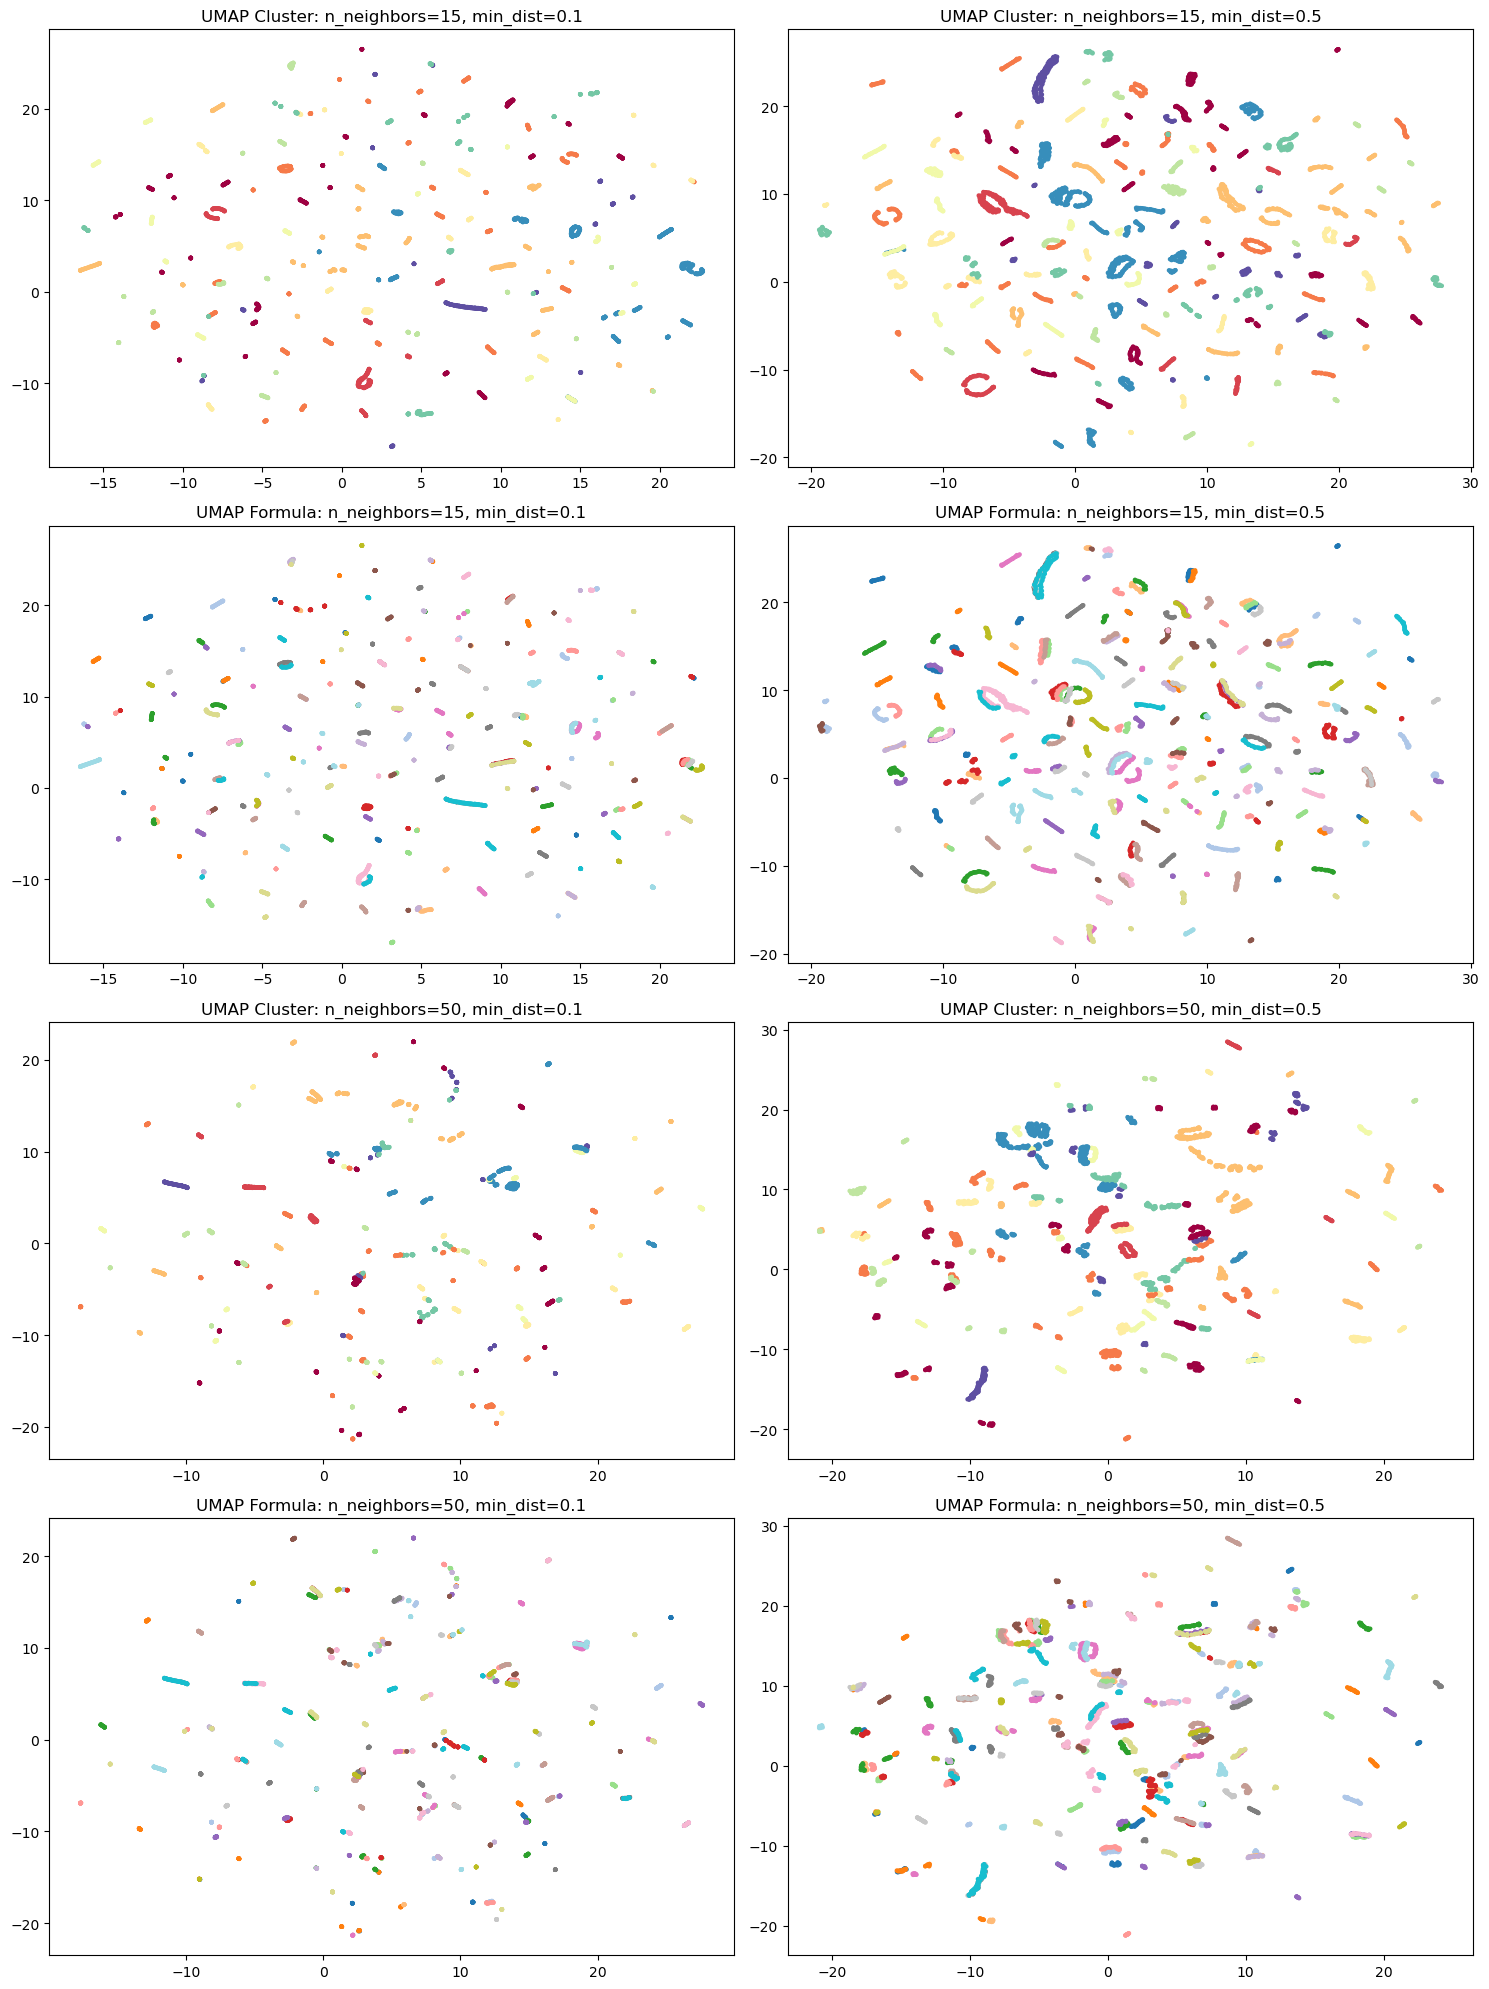

In [20]:
from umap import UMAP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'X' is your feature matrix from the previous step
# Assuming 'df' has a 'cluster' column with KMeans cluster assignments
# Assuming 'formula_to_color' maps each formula to a specific color

# Define levels for n_neighbors and min_dist
n_neighbors_values = [15, 50]  # Two levels of n_neighbors
min_dist_values = [0.1, 0.5]  # Two levels of min_dist

# Set up the figure for side-by-side plots for each combination
fig, axs = plt.subplots(len(n_neighbors_values) * 2, len(min_dist_values), figsize=(15, 20))

for i, n_neighbors in enumerate(n_neighbors_values):
    for j, min_dist in enumerate(min_dist_values):
        # Apply UMAP with the current n_neighbors and min_dist
        umap_embedding = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42).fit_transform(X)
        
        # Plotting cluster assignment
        ax_cluster = axs[i*2, j]  # Cluster plot on the left
        ax_cluster.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df['cluster'], cmap='Spectral', s=5)
        ax_cluster.set_title(f'UMAP Cluster: n_neighbors={n_neighbors}, min_dist={min_dist}')
        
        # Plotting formula
        ax_formula = axs[i*2 + 1, j]  # Formula plot on the right
        ax_formula.scatter(umap_embedding[:, 0], umap_embedding[:, 1], 
                          c=[formula_to_color[formula] for formula in df['formula']], s=5)
        ax_formula.set_title(f'UMAP Formula: n_neighbors={n_neighbors}, min_dist={min_dist}')

plt.tight_layout()
plt.show()


c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\byron\miniconda3\envs\HW2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


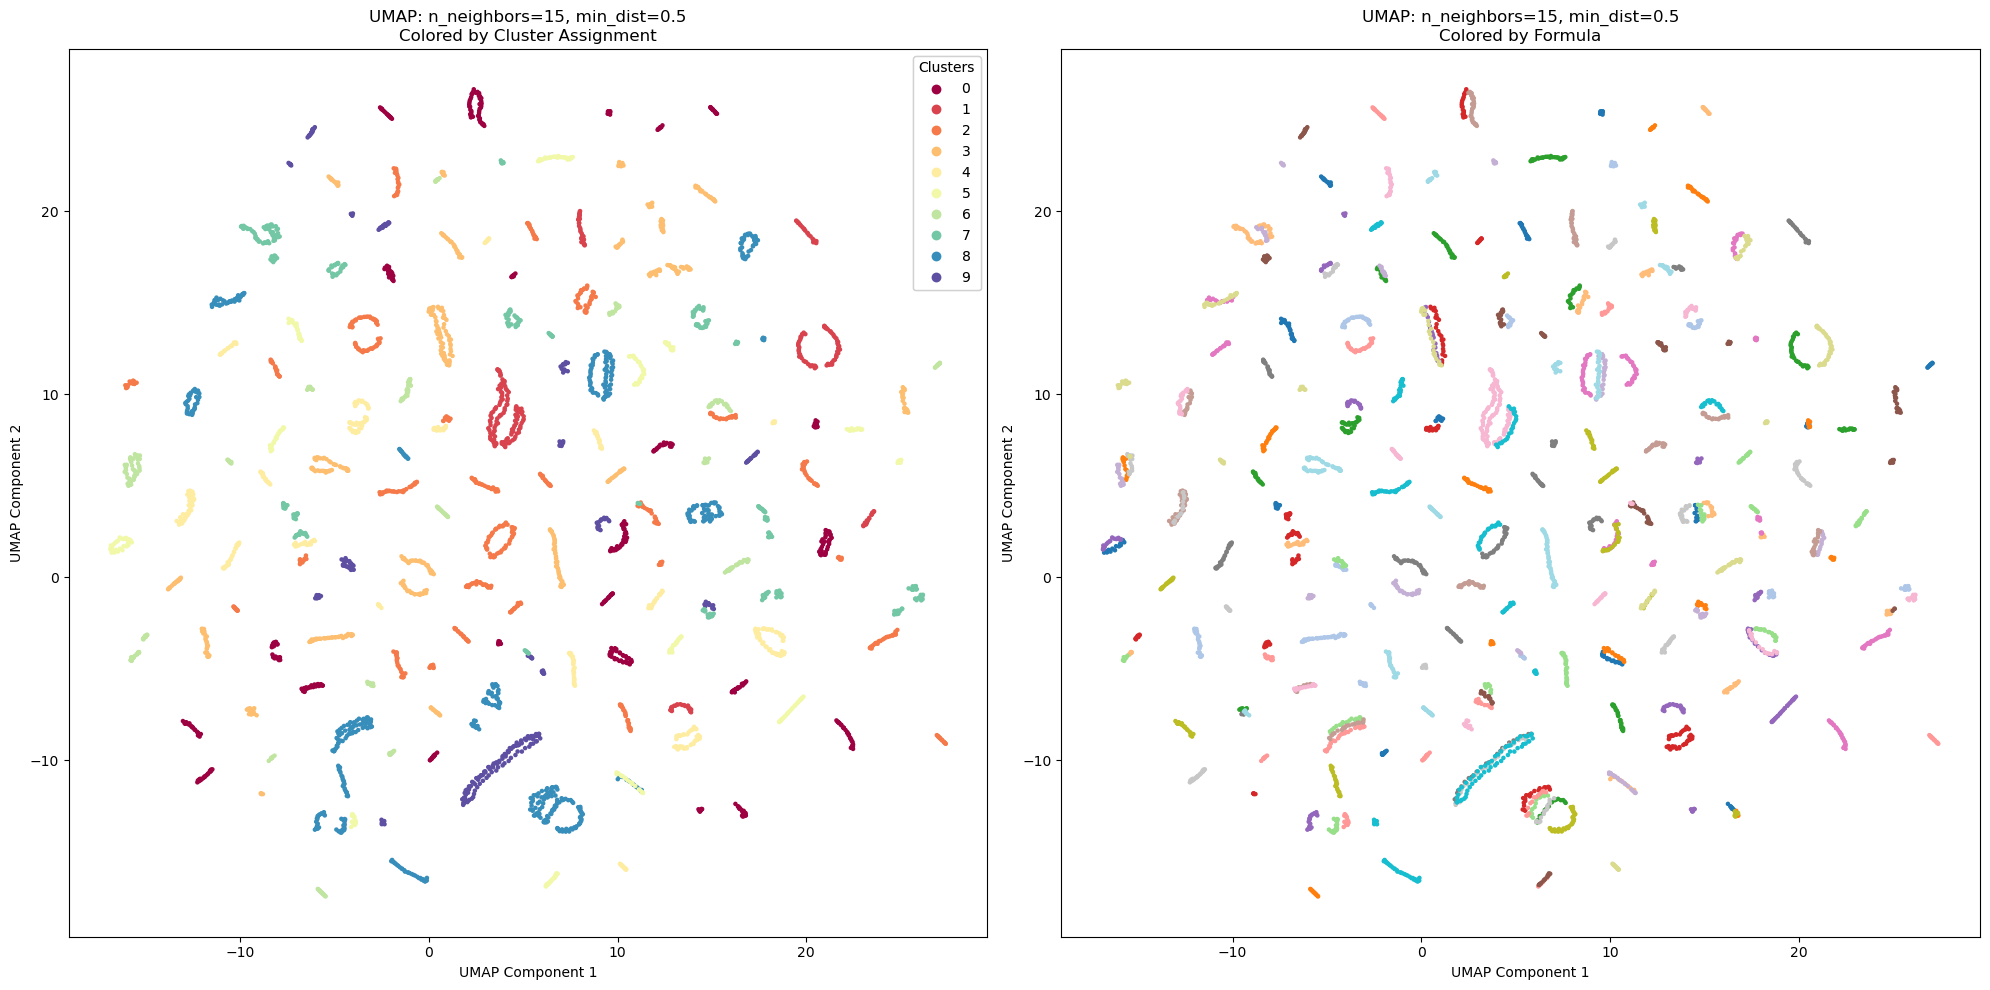

In [21]:
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np

# Specific UMAP parameters
n_neighbors = 15
min_dist = 0.5

# Generate UMAP embeddings
umap_embedding = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42).fit_transform(X)

# Set up the figure for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plotting by cluster assignment on the left
scatter_clusters = axs[0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df['cluster'], cmap='Spectral', s=5)
axs[0].set_title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}\nColored by Cluster Assignment')
axs[0].set_xlabel('UMAP Component 1')
axs[0].set_ylabel('UMAP Component 2')
# Optional: add a legend for clusters
legend1 = axs[0].legend(*scatter_clusters.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)

# Plotting by formula on the right
colors = [formula_to_color[formula] for formula in df['formula']]
scatter_formulas = axs[1].scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors, s=5)
axs[1].set_title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}\nColored by Formula')
axs[1].set_xlabel('UMAP Component 1')
axs[1].set_ylabel('UMAP Component 2')
# Creating a custom legend for formulas might not be practical if there are many unique formulas,
# but you can implement it similarly to the cluster legend if desired and feasible.

plt.tight_layout()
plt.show()


This embedding appears to do very well with teh olyinyk featurized data at 10 clusters

It would be interesting to pick a few of the clusters and evaluate how similar the formulae that were assigned to that cluster actually are.
